# Mini-Project 1 
## Traveling salesman problem using Minimum-Spanning Tree heuristic 
## George Tzanetakeis
## CSC421
## Jiazhuo Jiang
## V00892165

This project is based on material from Chapter 3 Solving Problems by Searching. You will need to review that material on your own. 

The traveling salesperson problem (TSP) can be formulated as a search problem and A* search can be used  with the minimum-spanning-tree (MST) heuristic. This heuristic estimates the cost of completing a tour, given that a partial tour has already been constructed. The MST cost of a set of cities is the smallest sum of the link costs of any tree that connects all the cities.

1. Write a problem generator and visualizer 
for instances of the TSP problem where cities are represented by random points in the unit square (6-10 cities are recommended) **(Basic - 2 points)**
2. Solve the path problem of visiting all cities using the two main uninformed search strategies (BFS and DFS) and display your solution as a path between the cities **(Basic - 2 points)**
3. Show and describe how the MST heuristic can be derived from a relaxed version of the TSP **(Expected - 2 points)**
4. Compare the average time (total number of nodes generated) and space (largest size of frontier) complexity for BFS and DFS when running your search algorithm. **(Expected - 2 points)**
4. Find an efficient algorithm in the literature for constructing the MST, and use it with A* graph search to solve instances of the TSP. **(Advanced - 2 points)**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

#1

City number(6-10)：10
Scale：100
((73.0, 81.0), (84.0, 60.0), (70.0, 54.0), (17.0, 59.0), (76.0, 83.0), (23.0, 81.0), (52.0, 72.0), (62.0, 6.0), (28.0, 69.0), (99.0, 25.0))
[[        inf 23.70653918 27.16615541 60.16643583  3.60555128 50.
  22.84731932 75.80237463 46.57252409 61.74139616]
 [23.70653918         inf 15.23154621 67.00746227 24.35159132 64.51356447
  34.17601498 58.30951895 56.71860365 38.07886553]
 [27.16615541 15.23154621         inf 53.23532662 29.61418579 54.20332093
  25.45584412 48.66210024 44.59820624 41.01219331]
 [60.16643583 67.00746227 53.23532662         inf 63.69458376 22.8035085
  37.33630941 69.52697318 14.86606875 88.76936408]
 [ 3.60555128 24.35159132 29.61418579 63.69458376         inf 53.03772242
  26.40075756 78.26237921 50.         62.39390996]
 [50.         64.51356447 54.20332093 22.8035085  53.03772242         inf
  30.3644529  84.53401682 13.         94.40338977]
 [22.84731932 34.17601498 25.45584412 37.33630941 26.40075756 30.3644529
          inf 6

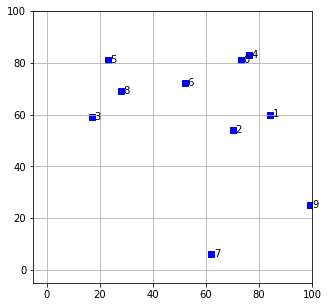

In [4]:
# Write a problem generator and visualizer for instances of the TSP problem where cities are represented by random points 
# in the unit square (6-10 cities are recommended) 

size = int(input("City number(6-10)："))
scale = int(input("Scale："))
city_pos = []

i = 0
while i < size:
    x = np.floor(np.random.rand() * scale)
    y = np.floor(np.random.rand() * scale)
    if (x, y) not in city_pos:
        city_pos.append((x, y))
        i = i + 1
city_pos = tuple(city_pos)

# position
#city_pos = ((45, 0), (67, 17), (22, 56), (42, 9), (48, 13), (4, 66), (58, 9), (5, 0), (81, 41), (97, 21))
#((24.0, 99.0), (47.0, 90.0), (54.0, 70.0), (39.0, 87.0), (45.0, 5.0), (93.0, 78.0), (96.0, 40.0), (58.0, 86.0), (40.0, 27.0), (65.0, 57.0))

print(city_pos)

# Calculate distance
def get_dist(pos_1, pos_2):
    if pos_1[0]==pos_2[0] and pos_1[1]==pos_2[1]:
        return np.inf
    else:
        return np.sqrt((pos_1[0] - pos_2[0])**2 + (pos_1[1] - pos_2[1])**2)

# Distances
dist = [[get_dist(pos_1, pos_2) for pos_2 in city_pos] for pos_1 in city_pos]
dist_array = np.array(dist)
print(dist_array)

# graph
plt.figure(figsize=(5,5))
plt.xlim([-5,100])
plt.ylim([-5,100])
for i,(x,y) in enumerate(city_pos):
    plt.scatter(x, y, c='b', marker='s')
    plt.annotate(i, (x+1, y-1))

plt.grid()
plt.show()

#2

[8, 3, 7, 9, 2, 1, 4, 0, 6, 5, 8]
min dist:  276.3989649553172
DFS time: 13.536s


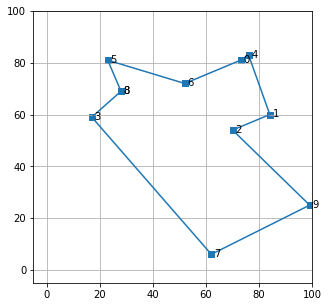

In [9]:
# 2 Solve the path problem of visiting all cities using the two main uninformed search strategies (BFS and DFS) 
# and display your solution as a path between the cities

#DFS

def show_path(path):
    plt.figure(figsize=(5,5))
    plt.xlim([-5,100])
    plt.ylim([-5,100])
    x = [city_pos[v_i][0] for v_i in path]
    y = [city_pos[v_i][1] for v_i in path]
    plt.scatter(x, y, marker='s')
    plt.plot(x, y)
    for i in range(len(path)):
        plt.annotate(path[i], (x[i] + 1, y[i] - 1))
    plt.grid()
    plt.show()
    return


def dist_calculate_DFS(layer,first):
    #print(Curpath[:layer], Curpath[1:layer+1])
    dist_sum = sum([dist_array[city1][city2] for city1,city2 in zip(curpath[:layer], curpath[1:layer+1])])

    dist_sum += dist_array[curpath[-1]][first]

    return dist_sum


def DFS(layer):
    global cur_min_dist, curpath
    global best_min_dist, bestpath
    if(layer == city_num):
        dist_sum = dist_calculate_DFS(layer,curpath[0])
        if(dist_sum <= cur_min_dist):
            cur_min_dist, best_min_dist = dist_sum, dist_sum
            bestpath = curpath[:]
            bestpath.append(curpath[0])
    else:
        for i in range(layer,city_num):
            curpath[i],curpath[layer] = curpath[layer],curpath[i]
            DFS(layer+1)
            curpath[i],curpath[layer] = curpath[layer],curpath[i]

city_num = len(city_pos)
curpath, bestpath = list(range(city_num)), []
cur_min_dist, best_min_dist = np.inf, 0

start_dfs = time.time()
DFS(0)
end_dfs = time.time()
time_dfs = end_dfs-start_dfs

print(bestpath)
print('min dist: ',best_min_dist)
print('DFS time: %.3fs'%(end_dfs-start_dfs))
show_path(bestpath)

[6, 5, 8, 3, 7, 9, 2, 1, 4, 0, 6]
min dist:  276.3989649553172
BFS time: 32.847s


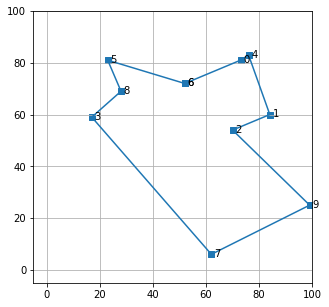

In [10]:
#BFS
from collections import deque

def dist_calculate_BFS(curpath):
    #print(Curpath[:layer], Curpath[1:layer+1])
    dist_sum = sum([dist_array[city1][city2] for city1,city2 in zip(curpath[:city_num], curpath[1:city_num+1])])

    dist_sum += dist_array[curpath[-1]][curpath[0]]

    return dist_sum

city_num = len(city_pos)
curpath, bestpath = tuple(range(city_num)), []
cur_min_dist, best_min_dist = np.inf, 0

start_bfs = time.time()

pathset = set()
firstpath = tuple(range(city_num))
dq = deque()
dq.append(firstpath)

while dq:
    curpath = dq.pop()
    if (curpath not in pathset):
        
        pathset.add(curpath)
        curpath = list(curpath)
        dist_sum = dist_calculate_BFS(curpath)
        if(dist_sum <= cur_min_dist):
            cur_min_dist, best_min_dist = dist_sum, dist_sum
            bestpath = curpath[:]
            bestpath.append(curpath[0])
            
        for i in range(1,city_num):
            curpath[0],curpath[i] = curpath[i],curpath[0]
            dq.append(tuple(curpath))
            curpath[0],curpath[i] = curpath[i],curpath[0]

end_bfs = time.time()
time_bfs = end_bfs-start_bfs
print(bestpath)
print('min dist: ',best_min_dist)
print('BFS time: %.3fs'%(end_bfs-start_bfs))
show_path(bestpath)

#3

#Show and describe how the MST heuristic can be derived from a relaxed version of the TSP

Processing flow of solving TSP problem based on heuristic minimum spanning tree algorithm(MST)

First select any vertex as the root of the tree and find the minimum spanning tree (any MST algorithm, here is implemented by Prim algorithm)
Then construct a closed loop from the minimum spanning tree (N cities do not repeat the sequence
Finally, determine the one with the smallest distance in the closed loop constructed from the minimum spanning tree generated from different vertices, that is, the shortest city sequence

#4

In [12]:
# 4 Compare the average time (total number of nodes generated) and space (largest size of frontier) complexity 
# for BFS and DFS when running your search algorithm

print('DFS time: %.3fs'%(end_dfs-start_dfs))
print('BFS time: %.3fs'%(end_bfs-start_bfs))

DFS time: 13.536s
BFS time: 32.847s


#5

dist:  365.9805921811367
[0, 4, 6, 1, 2, 8, 5, 3, 9, 7, 0]
[[ 0.          4.          3.60555128]
 [ 0.          6.         22.84731932]
 [ 0.          1.         23.70653918]
 [ 1.          2.         15.23154621]
 [ 6.          8.         24.18677324]
 [ 8.          5.         13.        ]
 [ 8.          3.         14.86606875]
 [ 1.          9.         38.07886553]
 [ 9.          7.         41.59326869]]


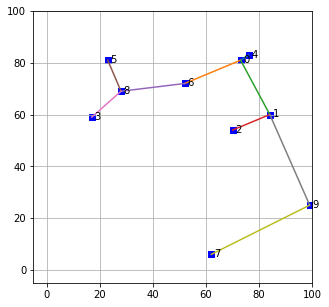

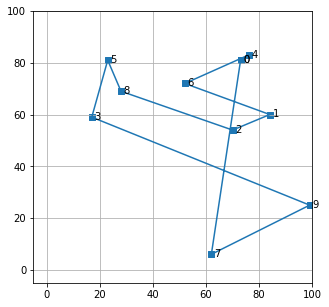

In [14]:
# 5 Find an efficient algorithm in the literature for constructing the MST, 
# and use it with A* graph search to solve instances of the TSP
def Prim(root):
    
    prim_list = []

    path = [root]
    selected_city = [root]
    candidate_city = [i for i in range(0, city_num)]
    candidate_city.remove(selected_city[0])

    while len(candidate_city) > 0 :
        min_dist = np.inf
        for i in selected_city:
            for j in candidate_city:
                if dist_array[i][j] < min_dist:
                    min_dist = dist_array[i][j]
                    cur_city = i
                    next_select_city = j
        prim_list.append([cur_city, next_select_city, min_dist])
        selected_city.append(next_select_city)
        candidate_city.remove(next_select_city)
        path.append(next_select_city)
    
    return path, prim_list

root = 0
path, prim_list = Prim(root)

print('dist: ',dist_calculate_BFS(path))
path.append(path[0])
print(path)
print(np.array(prim_list))

plt.figure(figsize=(5,5))
plt.xlim([-5,100])
plt.ylim([-5,100])
for i,(x,y) in enumerate(city_pos):
    plt.scatter(x, y, c='b', marker='s')
    plt.annotate(i, (x+1, y-1))

plt.grid()
for t_list in prim_list:
    plt.plot([city_pos[t_list[0]][0], city_pos[t_list[1]][0]], [city_pos[t_list[0]][1], city_pos[t_list[1]][1]])

plt.show()

show_path(path)

In [15]:
def get_adjacent(prim_list,root):
    adj_dict = {i:set() for i in range(city_num)}
    
    for i in range(prim_list.shape[0]):
        city_x,city_y = prim_list[i][0], prim_list[i][1]
        adj_dict[city_x].add(int(city_y))
        adj_dict[city_y].add(int(city_x))
        adj_dict[city_x].add(root)
        adj_dict[city_y].add(root)
    
    city = [i for i in range(0, city_num)]
    city.remove(root)
    adj_dict[root] = set(city)
    
    return adj_dict

In [16]:
import heapq
import itertools

class Node:
    def __init__(self, name, parent=None, cost=0, order=0):
        self.name = name
        self.cost = cost
        self.order = order
        self.parent = parent
    
    def __lt__(self, nn):
        if self.cost == nn.cost:
            return self.order < nn.order
        return self.cost < nn.cost

def a_star(startpt, endpt, adjacent):
    
    dist_root = dist_array[startpt][endpt]
    #s = Node(startpt,cost=dist_root)
    s = Node(startpt)
        
    queue = [(dist_root,0,s)]
    heapq.heapify(queue)
    visited = set()
    #visited.add(startpt)
    counter = itertools.count()
        
    while queue:
        f,o,node = heapq.heappop(queue)

        if node.name==endpt:
            path = []
            tmp_node = node
            while tmp_node is not None:
                path.append(tmp_node.name)
                tmp_node = tmp_node.parent
            if len(path)==(city_num+1):
                return path[::-1]
            
        for v in adjacent[node.name]:
            if (v not in visited):
                cost = node.cost + dist_array[node.name][v]
                f_value = node.cost + dist_array[v][endpt]
                #print(f_value)
                order = next(counter)
                nbr_state = Node(v, node, cost, order)
                heapq.heappush(queue, (f_value, order, nbr_state))
                visited.add(v)
        
    return []

[3, 8, 5, 6, 0, 4, 1, 2, 9, 7, 3]
min dist:  276.39896495531724
MST time: 0.001s


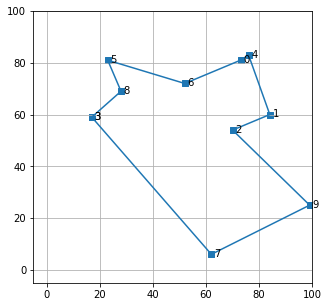

In [19]:
bestpath = []
best_min_dist = np.inf

start_mst = time.time()

for root in range(city_num):
    path, prim_list = Prim(root)
    dist_sum = dist_calculate_BFS(path)
    
    if(dist_sum <= best_min_dist):
        best_min_dist = dist_sum
        bestpath = path[:]
        bestpath.append(path[0])
    
    adjacent = get_adjacent(np.array(prim_list),root)
    path = a_star(root, root, adjacent)
    if path:
        dist_sum = dist_calculate_BFS(path)
        
        if(dist_sum <= best_min_dist):
            best_min_dist = dist_sum
            bestpath = path[:]
            bestpath.append(path[0])

end_mst = time.time()
print(bestpath)
print('min dist: ',best_min_dist)
print('MST time: %.3fs'%(end_mst-start_mst))
show_path(bestpath)

DONE